# import library 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import os
from joblib import dump


# import xgboost as xgb
# from sklearn.feature_selection import RFECV


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


import warnings
warnings.filterwarnings("ignore")

## load data

In [2]:
data = pd.read_csv('loan_sanction_train.csv')

In [3]:
test_data = pd.read_csv('loan_sanction_test.csv')

In [4]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


## merge to perform pre-processing on both

In [6]:
df = pd.concat([data,test_data],axis=0,ignore_index=True)

In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN
980,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,NaN


In [9]:
367+614

981

## explore

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [12]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

## handling null-value

### gender

In [13]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [14]:
df.Gender.mode()

0    Male
Name: Gender, dtype: object

In [15]:
df['Gender'].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [16]:
df['Gender'].mode().iloc[0]

'Male'

In [17]:
# think it's okay to fillna with male:
df['Gender'].fillna(df['Gender'].mode().iloc[0],inplace=True)

### Married

In [18]:
df.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [19]:
df.Married.value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [20]:

# df['Married'].dropna(inplace=True)
df.dropna(subset=['Married'], inplace=True)

In [21]:
df['Married']

0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
976    Yes
977    Yes
978     No
979    Yes
980     No
Name: Married, Length: 978, dtype: object

### Dependents

In [22]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [23]:
df.Dependents.value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [24]:
df.Dependents.mode()

0    0
Name: Dependents, dtype: object

In [25]:
# i have decided to go with zero cuz even tho it's numeric mode is best option 
df['Dependents'].fillna(df['Dependents'].mode().iloc[0],inplace=True)

### Self_Employed

In [26]:
df.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [27]:
df.Self_Employed.value_counts()

No     804
Yes    119
Name: Self_Employed, dtype: int64

In [28]:
df.Self_Employed.mode()

0    No
Name: Self_Employed, dtype: object

In [29]:
# in real world there is more chance if data is missing the value will be No
df['Self_Employed'].fillna(df['Self_Employed'].mode().iloc[0],inplace=True)

### LoanAmount

In [30]:
df.LoanAmount.nunique()

232

In [31]:
df.LoanAmount.mean()

142.4768907563025

In [32]:
# or say trim_mean
from scipy.stats import trim_mean
tm = trim_mean(df['LoanAmount'].dropna(axis=0), 0.1)
print(tm)

131.36482939632546


In [33]:
df['LoanAmount'].fillna(tm,inplace=True)

### Loan_Amount_Term

In [34]:
df.Loan_Amount_Term.nunique()

12

In [35]:
df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.,
       350.,   6.])

In [36]:
df.Loan_Amount_Term.mean()

342.1461377870564

In [37]:
tm_1 = trim_mean(df['Loan_Amount_Term'].dropna(axis=0),0.1)
tm_1

358.5807291666667

In [38]:
df['Loan_Amount_Term'].fillna(tm_1,inplace=True)

### Credit_History

In [39]:
df.Credit_History.unique()

array([ 1.,  0., nan])

In [40]:
df.Credit_History.value_counts()

1.0    751
0.0    148
Name: Credit_History, dtype: int64

In [41]:
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,131.364829,360.000000,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.000000,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.000000,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.000000,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.000000,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.000000,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.000000,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.000000,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.000000,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.000000,1.0,Semiurban,N


In [42]:
# let's do ffill here
df['Credit_History'].fillna(method='ffill',inplace=True)

### ----------------------------------------------------------------------------------------------...

# verify

In [43]:
df.isnull().sum()


Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [44]:
#here Loan_Status          367 is test_data so it's okay - no missing value;


## categorical - to - numeric

In [45]:
df.drop('Loan_ID',axis=1,inplace = True)

In [46]:
df.select_dtypes(include=object).columns




Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [47]:
for i in df.select_dtypes(include=object).columns:
    v = df[i].unique()
    print(f'Column:  {i}\n\n     *unique_value{v}\n')
    

Column:  Gender

     *unique_value['Male' 'Female']

Column:  Married

     *unique_value['No' 'Yes']

Column:  Dependents

     *unique_value['0' '1' '2' '3+']

Column:  Education

     *unique_value['Graduate' 'Not Graduate']

Column:  Self_Employed

     *unique_value['No' 'Yes']

Column:  Property_Area

     *unique_value['Urban' 'Rural' 'Semiurban']

Column:  Loan_Status

     *unique_value['Y' 'N' nan]



In [48]:
df['Gender'] = df['Gender'].replace(['Male','Female'],[1,0])

In [49]:
df['Married'] = df['Married'].replace(['No','Yes'],[0,1])

In [50]:
df['Dependents'] = df['Dependents'].replace('3+',3)

In [51]:
df['Education'] = df['Education'].replace(['Graduate','Not Graduate'],[1,0])

In [52]:
df['Self_Employed'] = df['Self_Employed'].replace(['No','Yes'],[0,1])

In [53]:
df['Property_Area'] = df['Property_Area'].replace(['Urban','Rural','Semiurban'],[2,0,1])

In [54]:
df['Loan_Status'] = df['Loan_Status'].replace(['Y','N'],[1,0])

In [55]:
df = df.apply(pd.to_numeric)

In [56]:
df['Loan_Status'].isnull().sum()

367

In [57]:
test_df = df[df['Loan_Status'].isnull()]
test_df.drop('Loan_Status',axis=1,inplace=True)
test_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
614,1,1,0,1,0,5720,0.0,110.0,360.0,1.0,2
615,1,1,1,1,0,3076,1500.0,126.0,360.0,1.0,2
616,1,1,2,1,0,5000,1800.0,208.0,360.0,1.0,2
617,1,1,2,1,0,2340,2546.0,100.0,360.0,1.0,2
618,1,0,0,0,0,3276,0.0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
976,1,1,3,0,1,4009,1777.0,113.0,360.0,1.0,2
977,1,1,0,1,0,4158,709.0,115.0,360.0,1.0,2
978,1,0,0,1,0,3250,1993.0,126.0,360.0,1.0,1
979,1,1,0,1,0,5000,2393.0,158.0,360.0,1.0,0


In [58]:
train_df = df.dropna()
train_df.reset_index(drop=True,inplace =True)

In [59]:
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,131.364829,360.0,1.0,2,1.0
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0.0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1.0
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1.0
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
606,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1.0
607,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1.0
608,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1.0
609,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1.0


## outliers

In [60]:
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN

In [61]:
# Preview the effects of multiple outlier removal methods on the dataframe and show how many outliers each would remove
print("[OUTLIER REMOVAL PREVIEWS]\n")                                   

# Set the name of the target column
target_column = 'Loan_Status'                                             # REMINDER: Ensure target column name is correct

# Create a copy of the dataframe
dataframe_two = train_df.copy()

# Separate the target column from the feature columns
target = dataframe_two[target_column]
features = dataframe_two.drop(target_column, axis=1)

# Remove outliers using the IQR method
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1
features = features[~((features < (Q1 - 1.5 * IQR)) |(features > (Q3 + 1.5 * IQR))).any(axis=1)]

# Get the cleaned feature indices
cleaned_feature_indices = features.index

# # Combine the target column with the cleaned feature columns
# dataframe_two = pd.concat([target, features], axis=1)
# dataframe_two.reset_index(drop=True, inplace=True)

# Print the number of rows in the dataframe before and after IQR outlier removal
print("PRE IQR OUTLIER REMOVAL ROWS: {}".format(train_df.shape[0]))
print("POST IQR OUTLIER REMOVAL ROWS: {}".format(len(features.index)))

# Create a copy of the dataframe
dataframe_three = train_df.copy()

# Separate the target column from the feature columns
target = dataframe_three[target_column]
features_3 = dataframe_three.drop(target_column, axis=1)

# Remove outliers using the Z-Score method
z_scores = np.abs(stats.zscore(features_3))
features_3 = features_3[(z_scores < 3).all(axis=1)]

# Get the cleaned feature indices
cleaned_feature_indices_3 = features_3.index

# # Combine the target column with the cleaned feature columns
# dataframe_three = pd.concat([target.iloc[cleaned_feature_indices], features], axis=1)
# dataframe_three.reset_index(drop=True, inplace=True)

# Print the number of rows in the dataframe before and after Z-Score outlier removal
print("PRE Z-SCORE OUTLIER REMOVAL ROWS: {}".format(train_df.shape[0]))
print("POST Z-SCORE OUTLIER REMOVAL ROWS: {}".format(len(features_3.index)))

# Create a copy of the dataframe
dataframe_four = train_df.copy()

# Separate the target column from the feature columns
target = dataframe_four[target_column]
features_4 = dataframe_four.drop(target_column, axis=1)

# Remove outliers using IsolationForest method
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
isolation_forest.fit(features_4)
y_noano = isolation_forest.predict(features_4)
cleaned_feature_indices_4 = features_4.index[y_noano == 1]

# # Combine the target column with the cleaned feature columns
dataframe_four = pd.concat([target.iloc[cleaned_feature_indices_4], features_4.iloc[cleaned_feature_indices_4]], axis=1)
dataframe_four.reset_index(drop=True, inplace=True)

# Print the number of rows in the dataframe before and after isolation forest outlier removal
print("PRE ISOLATION FOREST OUTLIER REMOVAL ROWS: {}".format(train_df.shape[0]))
print("POST ISOLATION FOREST OUTLIER REMOVAL ROWS: {}".format(len(cleaned_feature_indices_4)))

# Create a copy of the dataframe
dataframe_five = train_df.copy()

# Create a copy of the dataframe
dataframe_five = train_df.copy()

# Separate the target column from the feature columns
target = dataframe_five[target_column]
features_5 = dataframe_five.drop(target_column, axis=1)

# Remove outliers using local outlier factor method
local_outlier_factor = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_noano = local_outlier_factor.fit_predict(features_5)
cleaned_feature_indices_5 = features_5.index[y_noano == 1]

# Combine the target column with the cleaned feature columns
# dataframe_five = pd.concat([target.iloc[cleaned_feature_indices_5], features_5.iloc[cleaned_feature_indices_5]], axis=1)
# dataframe_five.reset_index(drop=True, inplace=True)

# Print the number of rows in the dataframe before and after local outlier factor outlier removal
print("PRE LOCAL OUTLIER FACTOR OUTLIER REMOVAL ROWS: {}".format(train_df.shape[0]))
print("POST LOCAL OUTLIER FACTOR OUTLIER REMOVAL ROWS: {}".format(len(cleaned_feature_indices_5)))

# Create a copy of the dataframe
dataframe_six = train_df.copy()

# Separate the target column from the feature columns
target = dataframe_six[target_column]
features_6 = dataframe_six.drop(target_column, axis=1)

# Remove outliers using One Class SVM method
one_class_svm = OneClassSVM(nu=0.1, kernel='rbf', gamma=0.1)
y_noano = one_class_svm.fit_predict(features_6)
cleaned_feature_indices_6 = features_6.index[y_noano == 1]

# Combine the target column with the cleaned feature columns
# dataframe_six = pd.concat([target.iloc[cleaned_feature_indices], features.iloc[cleaned_feature_indices]], axis=1)
# dataframe_six.reset_index(drop=True, inplace=True)

# Print the number of rows in the dataframe before and after one class SVM outlier removal
print("PRE ONE CLASS SVM OUTLIER REMOVAL ROWS: {}".format(train_df.shape[0]))
print("POST ONE CLASS SVM OUTLIER REMOVAL ROWS: {}".format(len(cleaned_feature_indices_6)))

# Create a copy of the dataframe
dataframe_seven = train_df.copy()

# Separate the target column from the feature columns
target = dataframe_seven[target_column]
features_7 = dataframe_seven.drop(target_column, axis=1)

# Remove outliers using DBSCAN method
dbscan = DBSCAN(eps=0.5, min_samples=10)
y_noano = dbscan.fit_predict(features_7)
cleaned_feature_indices_7 = features_7.index[y_noano == 1]

# Combine the target column with the cleaned feature columns
# dataframe_seven = pd.concat([target.iloc[cleaned_feature_indices], features.iloc[cleaned_feature_indices]], axis=1)
# dataframe_seven.reset_index(drop=True, inplace=True)

# Print the number of rows in the dataframe before and after DBSCAN outlier removal
print("PRE DBSCAN OUTLIER REMOVAL ROWS: {}".format(train_df.shape[0]))
print("POST DBSCAN OUTLIER REMOVAL ROWS: {}".format(len(cleaned_feature_indices_7)))

[OUTLIER REMOVAL PREVIEWS]

PRE IQR OUTLIER REMOVAL ROWS: 611
POST IQR OUTLIER REMOVAL ROWS: 198
PRE Z-SCORE OUTLIER REMOVAL ROWS: 611
POST Z-SCORE OUTLIER REMOVAL ROWS: 574
PRE ISOLATION FOREST OUTLIER REMOVAL ROWS: 611
POST ISOLATION FOREST OUTLIER REMOVAL ROWS: 550
PRE LOCAL OUTLIER FACTOR OUTLIER REMOVAL ROWS: 611
POST LOCAL OUTLIER FACTOR OUTLIER REMOVAL ROWS: 550
PRE ONE CLASS SVM OUTLIER REMOVAL ROWS: 611
POST ONE CLASS SVM OUTLIER REMOVAL ROWS: 533
PRE DBSCAN OUTLIER REMOVAL ROWS: 611
POST DBSCAN OUTLIER REMOVAL ROWS: 0


In [62]:
dataframe_four

,Loan_Status,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1,0,0,1,0,5849,0.0,131.364829,360.0,1.0,2
1,0.0,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,1.0,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2
3,1.0,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2
4,1.0,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
545,1.0,1,1,0,1,0,3232,1950.0,108.000000,360.0,1.0,0
546,1.0,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0
547,1.0,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0
548,1.0,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2


In [63]:
dataframe_four = dataframe_four.astype(int)

In [64]:
dataframe_four

,Loan_Status,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,1,0,5849,0,131,360,1,2
1,0,1,1,1,1,0,4583,1508,128,360,1,0
2,1,1,1,0,1,1,3000,0,66,360,1,2
3,1,1,1,0,0,0,2583,2358,120,360,1,2
4,1,1,0,0,1,0,6000,0,141,360,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
545,1,1,1,0,1,0,3232,1950,108,360,1,0
546,1,0,0,0,1,0,2900,0,71,360,1,0
547,1,1,1,3,1,0,4106,0,40,180,1,0
548,1,1,1,1,1,0,8072,240,253,360,1,2


In [65]:
final_df = dataframe_four.copy()

In [66]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Loan_Status        550 non-null    int32
 1   Gender             550 non-null    int32
 2   Married            550 non-null    int32
 3   Dependents         550 non-null    int32
 4   Education          550 non-null    int32
 5   Self_Employed      550 non-null    int32
 6   ApplicantIncome    550 non-null    int32
 7   CoapplicantIncome  550 non-null    int32
 8   LoanAmount         550 non-null    int32
 9   Loan_Amount_Term   550 non-null    int32
 10  Credit_History     550 non-null    int32
 11  Property_Area      550 non-null    int32
dtypes: int32(12)
memory usage: 25.9 KB


In [67]:
final_df.isnull().sum().sum()

0

In [68]:
final_df.columns

Index(['Loan_Status', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

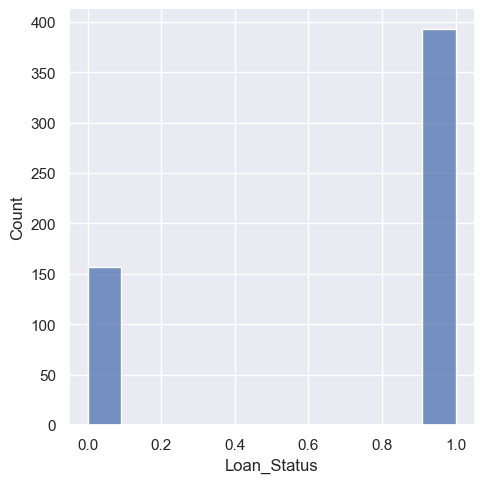

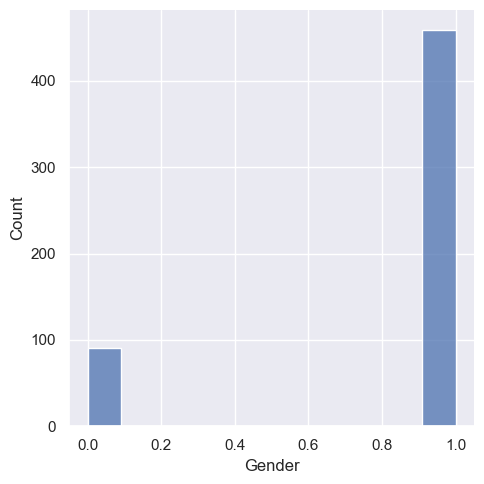

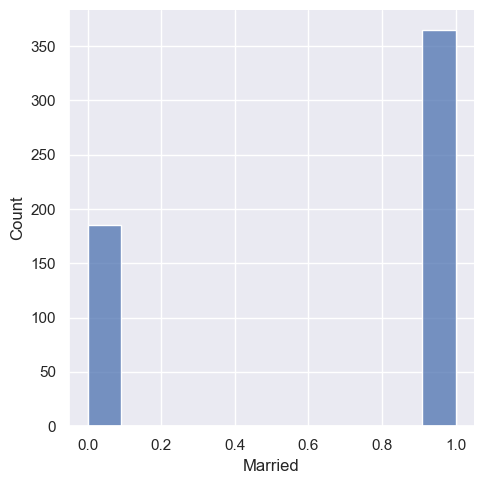

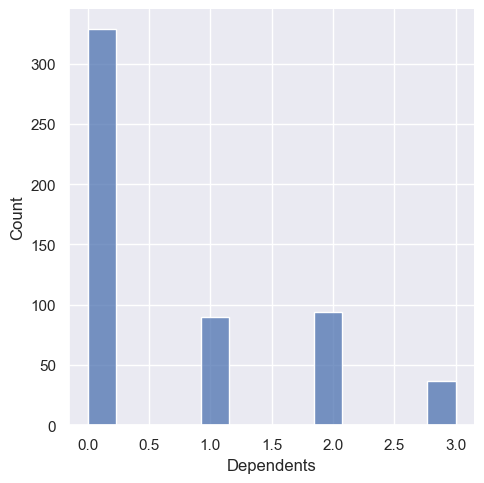

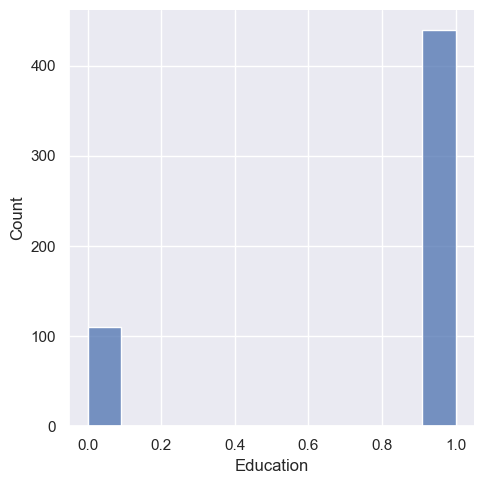

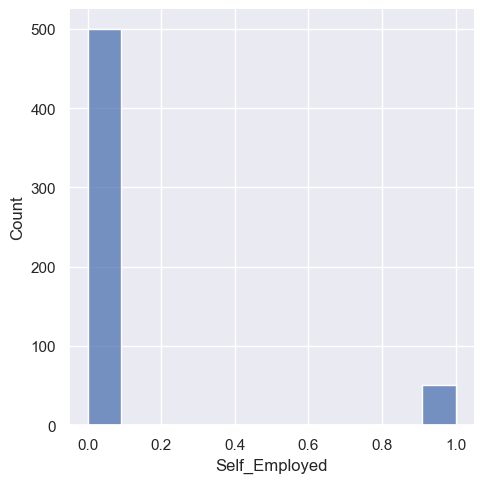

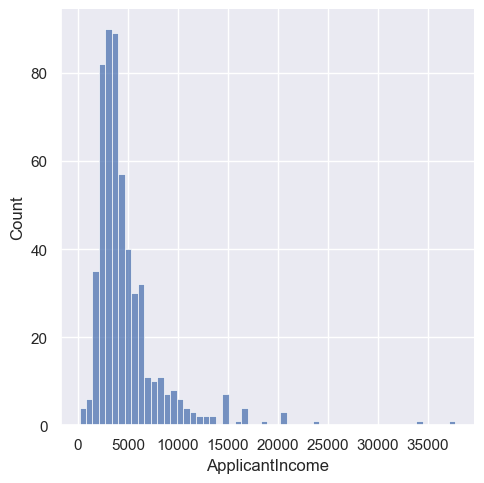

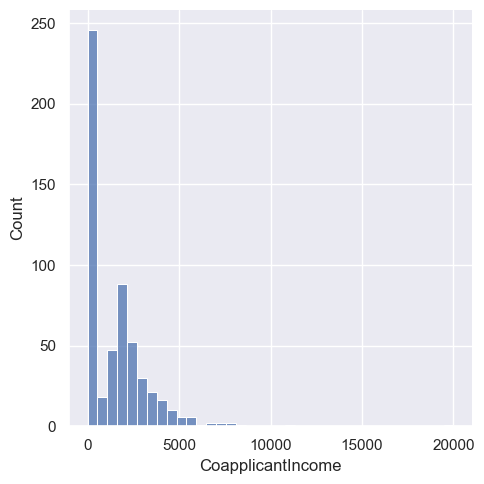

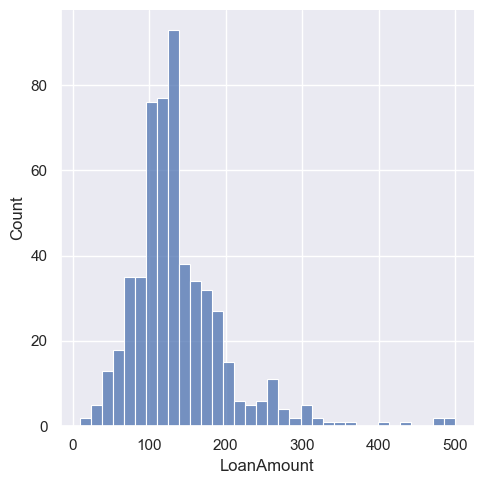

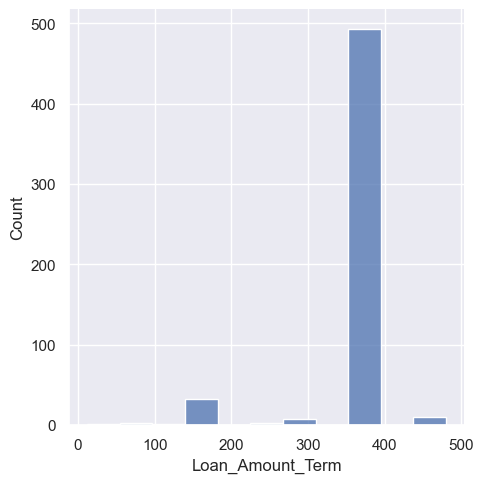

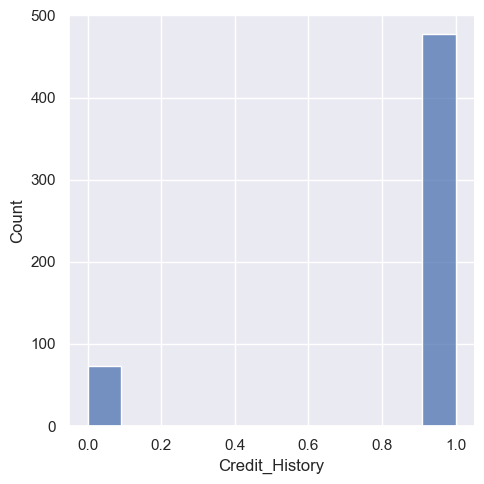

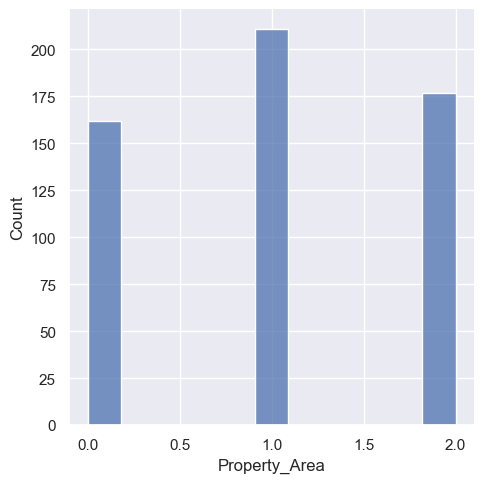

In [69]:
for i in final_df.columns:
    v = sns.displot(final_df[i])
    print(v)

# train&test 

In [70]:
x = final_df.drop('Loan_Status',axis=1)

In [71]:
y = final_df['Loan_Status']

## train test split

In [72]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=12)

In [73]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
486,0,1,0,0,0,3017,663,102,360,1,1
391,1,0,0,1,0,3660,5064,187,360,1,1
442,1,1,0,1,0,4625,2857,111,12,1,2
94,1,0,0,1,0,4843,3806,151,360,1,1
16,1,0,1,0,0,3596,0,100,240,1,2
...,...,...,...,...,...,...,...,...,...,...,...
432,1,1,1,0,0,1958,2436,131,360,1,0
259,0,0,0,1,0,4124,0,115,360,1,1
241,0,0,0,1,0,3418,0,135,360,1,0
253,1,1,0,1,0,3927,800,112,360,1,1


In [74]:
x_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
151,1,1,0,1,0,9323,0,75,180,1,2
294,1,0,0,1,0,4917,0,130,360,0,0
499,1,1,0,1,0,3887,2669,162,360,1,1
446,0,0,0,1,0,3159,0,100,360,1,1
381,1,1,2,1,0,5935,0,133,360,1,1
...,...,...,...,...,...,...,...,...,...,...,...
48,0,0,0,1,0,4000,2275,144,360,1,1
206,1,1,0,0,1,4735,0,138,360,1,2
37,1,0,0,1,0,4166,7210,184,360,1,2
317,1,0,0,1,0,8750,4167,308,360,1,0


In [75]:
y_train

486    1
391    1
442    1
94     1
16     1
      ..
432    1
259    1
241    0
253    1
390    1
Name: Loan_Status, Length: 412, dtype: int32

In [76]:
y_test

151    1
294    1
499    1
446    1
381    1
      ..
48     1
206    0
37     1
317    0
334    0
Name: Loan_Status, Length: 138, dtype: int32

## scale

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [78]:
dump(scaler,'./../savedmodel/scaled.joblib')
print('model saved as scaled.joblib')

model saved as scaled.joblib


In [79]:
x_train_scaled = pd.DataFrame(x_train_scaled)
x_test_scaled = pd.DataFrame(x_test_scaled)

In [80]:
x_train_scaled

,0,1,2,3,4,5,6,7,8,9,10
0,-2.289634,0.694273,-0.707812,-1.946971,-0.309426,-0.495435,-0.455162,-0.546516,0.214741,0.375865,-0.012366
1,0.436751,-1.440357,-0.707812,0.513618,-0.309426,-0.309043,2.252460,0.703418,0.214741,0.375865,-0.012366
2,0.436751,0.694273,-0.707812,0.513618,-0.309426,-0.029310,0.894650,-0.414170,-6.560930,0.375865,1.261328
3,0.436751,-1.440357,-0.707812,0.513618,-0.309426,0.033883,1.478502,0.174034,0.214741,0.375865,-0.012366
4,0.436751,-1.440357,0.341176,-1.946971,-0.309426,-0.327595,-0.863058,-0.575926,-2.121698,0.375865,1.261328
...,...,...,...,...,...,...,...,...,...,...,...
407,0.436751,0.694273,0.341176,-1.946971,-0.309426,-0.802416,0.635639,-0.120068,0.214741,0.375865,-1.286060
408,-2.289634,-1.440357,-0.707812,0.513618,-0.309426,-0.174539,-0.863058,-0.355349,0.214741,0.375865,-0.012366
409,-2.289634,-1.440357,-0.707812,0.513618,-0.309426,-0.379193,-0.863058,-0.061247,0.214741,0.375865,-1.286060
410,0.436751,0.694273,-0.707812,0.513618,-0.309426,-0.231645,-0.370875,-0.399465,0.214741,0.375865,-0.012366


In [81]:
x_test_scaled

,0,1,2,3,4,5,6,7,8,9,10
0,0.436751,0.694273,-0.707812,0.513618,-0.309426,1.332539,-0.863058,-0.943553,-3.289917,0.375865,1.261328
1,0.436751,-1.440357,-0.707812,0.513618,-0.309426,0.055334,-0.863058,-0.134773,0.214741,-2.660532,-1.286060
2,0.436751,0.694273,-0.707812,0.513618,-0.309426,-0.243240,0.778987,0.335790,0.214741,0.375865,-0.012366
3,-2.289634,-1.440357,-0.707812,0.513618,-0.309426,-0.454272,-0.863058,-0.575926,0.214741,0.375865,-0.012366
4,0.436751,0.694273,1.390164,0.513618,-0.309426,0.350431,-0.863058,-0.090658,0.214741,0.375865,-0.012366
...,...,...,...,...,...,...,...,...,...,...,...
133,-2.289634,-1.440357,-0.707812,0.513618,-0.309426,-0.210484,0.536587,0.071098,0.214741,0.375865,-0.012366
134,0.436751,0.694273,-0.707812,-1.946971,3.231787,0.002577,-0.863058,-0.017132,0.214741,0.375865,1.261328
135,0.436751,-1.440357,-0.707812,0.513618,-0.309426,-0.162364,3.572741,0.659302,0.214741,0.375865,1.261328
136,0.436751,-1.440357,-0.707812,0.513618,-0.309426,1.166439,1.700600,2.482735,0.214741,0.375865,-1.286060


In [82]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [83]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
gb = GradientBoostingClassifier()
suv = SVC()
lr = LogisticRegression()

In [84]:
rf.fit(x_train_scaled, y_train)
dt.fit(x_train_scaled, y_train)
gb.fit(x_train_scaled, y_train)
suv.fit(x_train_scaled, y_train)
lr.fit(x_train_scaled, y_train)

LogisticRegression()

In [85]:
y_pred_rf = rf.predict(x_test_scaled)
y_pred_dt = dt.predict(x_test_scaled)
y_pred_gb = gb.predict(x_test_scaled)
y_pred_suv = suv.predict(x_test_scaled)
y_pred_lr = lr.predict(x_test_scaled)

In [86]:
rf

RandomForestClassifier()

In [87]:
print(f'\naccuracy_score of {rf} \n{accuracy_score(y_test,y_pred_rf)}')
print(f'\naccuracy_score of {dt} \n{accuracy_score(y_test,y_pred_dt)}')
print(f'\naccuracy_score of {gb} \n{accuracy_score(y_test,y_pred_gb)}')
print(f'\naccuracy_score of {suv} \n{accuracy_score(y_test,y_pred_suv)}')
print(f'\naccuracy_score of {lr} \n{accuracy_score(y_test,y_pred_lr)}')


accuracy_score of RandomForestClassifier() 
0.8405797101449275

accuracy_score of DecisionTreeClassifier() 
0.6594202898550725

accuracy_score of GradientBoostingClassifier() 
0.7898550724637681

accuracy_score of SVC() 
0.8478260869565217

accuracy_score of LogisticRegression() 
0.855072463768116


# hyper-parameter

In [88]:
# from sklearn.model_selection import GridSearchCV
# rf = RandomForestClassifier()

In [89]:
# n_estimators=range(50,200,50)
# criterion=['gini','entropy']
# max_depth=range(1,4,1)
# min_samples_split=[2,3,4]
# min_samples_leaf=[1,2]
# max_features=['sqrt','auto','log2']
# max_leaf_nodes=[1,None]

# bootstrap=[True,False]






# max_samples=[0.5,0.75,1,None]

In [90]:
# len(n_estimators) --> 3

In [91]:
# param_grid = {'n_estimators':n_estimators,
#     'criterion':criterion,
#     'max_depth':max_depth,
#     'min_samples_split':min_samples_split,
#     'min_samples_leaf':min_samples_leaf,

#     'max_features':max_features,
#     'max_leaf_nodes':max_leaf_nodes,
#     'bootstrap':bootstrap,

#     'max_samples':max_samples,
    
# }
# print(param_grid)

In [92]:
# grid_model = GridSearchCV(estimator=rf,
#                           param_grid=param_grid,
#                           cv=5,
#                           n_jobs=-1,
#                           verbose=2)

In [93]:
# grid_model.fit(x_train_scaled,y_train)

In [94]:
# grid_model.best_params_

In [95]:
# 0/0

In [96]:
grid_rf = RandomForestClassifier(n_estimators= 150,bootstrap= True,criterion= 'gini',max_depth= 2,max_features= 'sqrt',max_leaf_nodes= None,max_samples= 0.75)

In [97]:
grid_rf.fit(x_train_scaled, y_train)

RandomForestClassifier(max_depth=2, max_samples=0.75, n_estimators=150)

In [98]:
y_pred_grid_rf = grid_rf.predict(x_test_scaled)

In [99]:
y_pred_grid_rf

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0])

In [100]:
accuracy_score(y_test,y_pred_grid_rf)

0.8623188405797102

## confusion-classification

In [101]:
from sklearn.metrics import confusion_matrix,classification_report

In [102]:
matrix = confusion_matrix(y_test,y_pred_grid_rf)
print(f'\n\n\n{matrix}\n\n')




[[ 19  16]
 [  3 100]]




In [103]:
(19+100)/(19+100+16+3) #verifing accuracy

0.8623188405797102

In [104]:
report = classification_report(y_test,y_pred_grid_rf)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.54      0.67        35
           1       0.86      0.97      0.91       103

    accuracy                           0.86       138
   macro avg       0.86      0.76      0.79       138
weighted avg       0.86      0.86      0.85       138



### don;t have gpu to run xgboost


In [105]:
# model_xgb = xgb.XGBClassifier(random_state=42, objective='binary:logistic', eval_metric='error', tree_method='gpu_hist')

In [106]:
# selector = RFECV(estimator=model_xgb, step=1, cv=5, scoring='accuracy')

In [107]:
# # Fit the selector to the training data
# selector.fit(x_train_scaled, y_train)

# # Print the optimal number of features
# print(f"[OPTIMAL NUMBER OF FEATURES DETERMINED BY RECURSIVE FEATURE ELIMINATION]\n {selector.n_features_}")

# # Print which features were kept and which were dropped
# selected_features = X_train.columns[selector.support_]
# dropped_features = X_train.columns[~selector.support_]
# print("\n[SELECTED FEATURES]\n", selected_features)
# print("\n[DROPPED FEATURES]\n", dropped_features)


# save

In [108]:
# best_model = grid_model.best_estimator_

In [109]:
dump(grid_rf,'./../savedmodel/loan_predictor.joblib')
print('model saved as loan_predictor.joblib')


model saved as loan_predictor.joblib


In [110]:
# y_df = pd.DataFrame({'Gender':1,'Married':2,'Dependents':3,'Education':2,'Self_Employed':2,'ApplicantIncome':2,'CoapplicantIncome':3,'LoanAmount':3,'Loan_Amount_Term':3,'Credit_History':3,'Property_Area':2}index)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (58721467.py, line 1)